In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

#Importación y Limpieza de datos

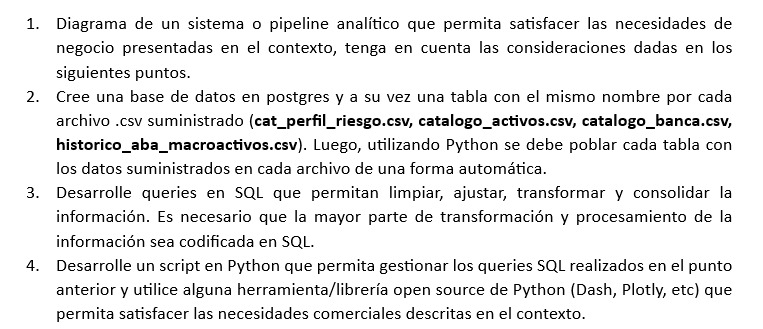

In [2]:
# PostgreSQL credentials
user = "username"
password = "password"
host = "public_ip_address"
database = "gerencia"

# SQLAlchemy engine
engine = create_engine(f"postgresql://{user}:{password}@{host}/{database}")

In [3]:
import sqlite3

conn = sqlite3.connect('gerencia.db')

for csv_file in ["cat_perfil_riesgo.csv", "catalogo_activos.csv", "catalogo_banca.csv", "historico_aba_macroactivos.csv"]:
    df = pd.read_csv(csv_file)
    table_name = csv_file.split('.')[0]
    df.to_sql(table_name, conn, if_exists='replace', index=False)


In [4]:
engine = create_engine('sqlite:///gerencia.db')

## Verificación de tablas

In [5]:
query = "SELECT * FROM cat_perfil_riesgo"
df1 = pd.read_sql_query(query, engine)
print(df1.head())

   cod_perfil_riesgo perfil_riesgo
0               1469      AGRESIVO
1               1468      MODERADO
2               1466   SIN DEFINIR
3               1467   CONSERVADOR


In [6]:
query = "SELECT * FROM catalogo_activos"
df2 = pd.read_sql_query(query, engine)
print(df2.head())

                 activo  cod_activo
0  CDT BANCOLOMBIA B360        1000
1      CDT TUYA TF B360        1001
2                CELSIA        1002
3              CEMARGOS        1003
4             ECOPETROL        1004


In [7]:
query = "SELECT * FROM catalogo_banca"
df3 = pd.read_sql_query(query, engine)
print(df3.head())

  cod_banca         banca
0        PR       Privada
1        PN      Personal
2        PF  Preferencial
3        EG      Empresas
4        PY         Pymes


In [8]:
query = "SELECT * FROM historico_aba_macroactivos"
df4 = pd.read_sql_query(query, engine)
print(df4.head())

   ingestion_year  ingestion_month  ingestion_day id_sistema_cliente  \
0            2023             12.0             20        1.00114E+12   
1            2024              2.0              1        10020203023   
2            2024              3.0             22        10032184607   
3            2024              2.0             27        1.00902E+11   
4            2023             12.0             11        1.00103E+12   

      macroactivo cod_activo           aba cod_perfil_riesgo cod_banca  year  \
0  Renta Variable       1004  2.370000e+06              1466        PN  2023   
1            FICs       None  4.457081e+08              1468        PR  2024   
2  Renta Variable       1011  8.288500e+06              1468        PN  2024   
3            FICs       1019  1.049542e+09              1467        PF  2024   
4  Renta Variable       1004  1.232500e+06              1468        PN  2023   

   month  
0   12.0  
1    2.0  
2    3.0  
3    2.0  
4   12.0  


In [9]:
query = """
SELECT *
FROM catalogo_activos AS df2
INNER JOIN historico_aba_macroactivos AS df4
ON df2.cod_activo = df4.cod_activo
"""
resultado = pd.read_sql_query(query, engine)
resultado.head()

,activo,cod_activo,ingestion_year,ingestion_month,ingestion_day,id_sistema_cliente,macroactivo,cod_activo,aba,cod_perfil_riesgo,cod_banca,year,month
0,ECOPETROL,1004,2023,12.0,20,1.00114E+12,Renta Variable,1004,2.370000e+06,1466,PN,2023,12.0
1,GRUBOLIVAR,1011,2024,3.0,22,10032184607,Renta Variable,1011,8.288500e+06,1468,PN,2024,3.0
2,Renta Liquidez,1019,2024,2.0,27,1.00902E+11,FICs,1019,1.049542e+09,1467,PF,2024,2.0
3,ECOPETROL,1004,2023,12.0,11,1.00103E+12,Renta Variable,1004,1.232500e+06,1468,PN,2023,12.0
4,ECOPETROL,1004,2024,1.0,24,10041560001,Renta Variable,1004,1.147500e+06,1466,PN,2024,1.0


In [10]:
queryTwo = """
SELECT *
FROM cat_perfil_riesgo AS df1
INNER JOIN (
    SELECT *
    FROM catalogo_activos AS df2
    INNER JOIN historico_aba_macroactivos AS df4
    ON df2.cod_activo = df4.cod_activo
) AS resultado
ON df1.cod_perfil_riesgo = resultado.cod_perfil_riesgo
"""
resultado_riesgo = pd.read_sql_query(query, engine)
resultado_riesgo.head()

,activo,cod_activo,ingestion_year,ingestion_month,ingestion_day,id_sistema_cliente,macroactivo,cod_activo,aba,cod_perfil_riesgo,cod_banca,year,month
0,ECOPETROL,1004,2023,12.0,20,1.00114E+12,Renta Variable,1004,2.370000e+06,1466,PN,2023,12.0
1,GRUBOLIVAR,1011,2024,3.0,22,10032184607,Renta Variable,1011,8.288500e+06,1468,PN,2024,3.0
2,Renta Liquidez,1019,2024,2.0,27,1.00902E+11,FICs,1019,1.049542e+09,1467,PF,2024,2.0
3,ECOPETROL,1004,2023,12.0,11,1.00103E+12,Renta Variable,1004,1.232500e+06,1468,PN,2023,12.0
4,ECOPETROL,1004,2024,1.0,24,10041560001,Renta Variable,1004,1.147500e+06,1466,PN,2024,1.0


In [11]:
query = """
SELECT *
FROM catalogo_banca AS df3
INNER JOIN (
    SELECT *
    FROM cat_perfil_riesgo AS df1
    INNER JOIN (
        SELECT *
        FROM catalogo_activos AS df2
        INNER JOIN historico_aba_macroactivos AS df4
        ON df2.cod_activo = df4.cod_activo
    ) AS resultado
    ON df1.cod_perfil_riesgo = resultado.cod_perfil_riesgo
) AS resultado_riesgo
ON df3.cod_banca = resultado_riesgo.cod_banca
"""
df_final = pd.read_sql_query(query, engine)
df_final.head()

,cod_banca,banca,cod_perfil_riesgo,perfil_riesgo,activo,cod_activo,ingestion_year,ingestion_month,ingestion_day,id_sistema_cliente,macroactivo,cod_activo:1,aba,cod_perfil_riesgo:1,cod_banca,year,month
0,PR,Privada,1468,MODERADO,Fidurenta,1008,2023,11.0,23,1.0089E+11,FICs,1008,2.129277e+07,1468,PR,2023,11.0
1,PR,Privada,1468,MODERADO,Renta Liquidez,1019,2023,11.0,23,1.0089E+11,FICs,1019,2.463732e+07,1468,PR,2023,11.0
2,PR,Privada,1468,MODERADO,Fondo Cerrado Renta Fija IV,1009,2023,11.0,23,10020203023,FICs,1009,1.058721e+08,1468,PR,2023,11.0
3,PR,Privada,1468,MODERADO,Fondo Cerrado Renta Fija V,1010,2023,11.0,23,10020203023,FICs,1010,1.513369e+08,1468,PR,2023,11.0
4,PR,Privada,1468,MODERADO,Renta Liquidez,1019,2023,11.0,23,10020203023,FICs,1019,9.040334e+07,1468,PR,2023,11.0


In [12]:
# Transformacion aplicada
df_final['month'] = df_final['month'].fillna(0).astype(int)
df_final['ingestion_month'] = df_final['ingestion_month'].fillna(0).astype(int)

#Pregunta 1

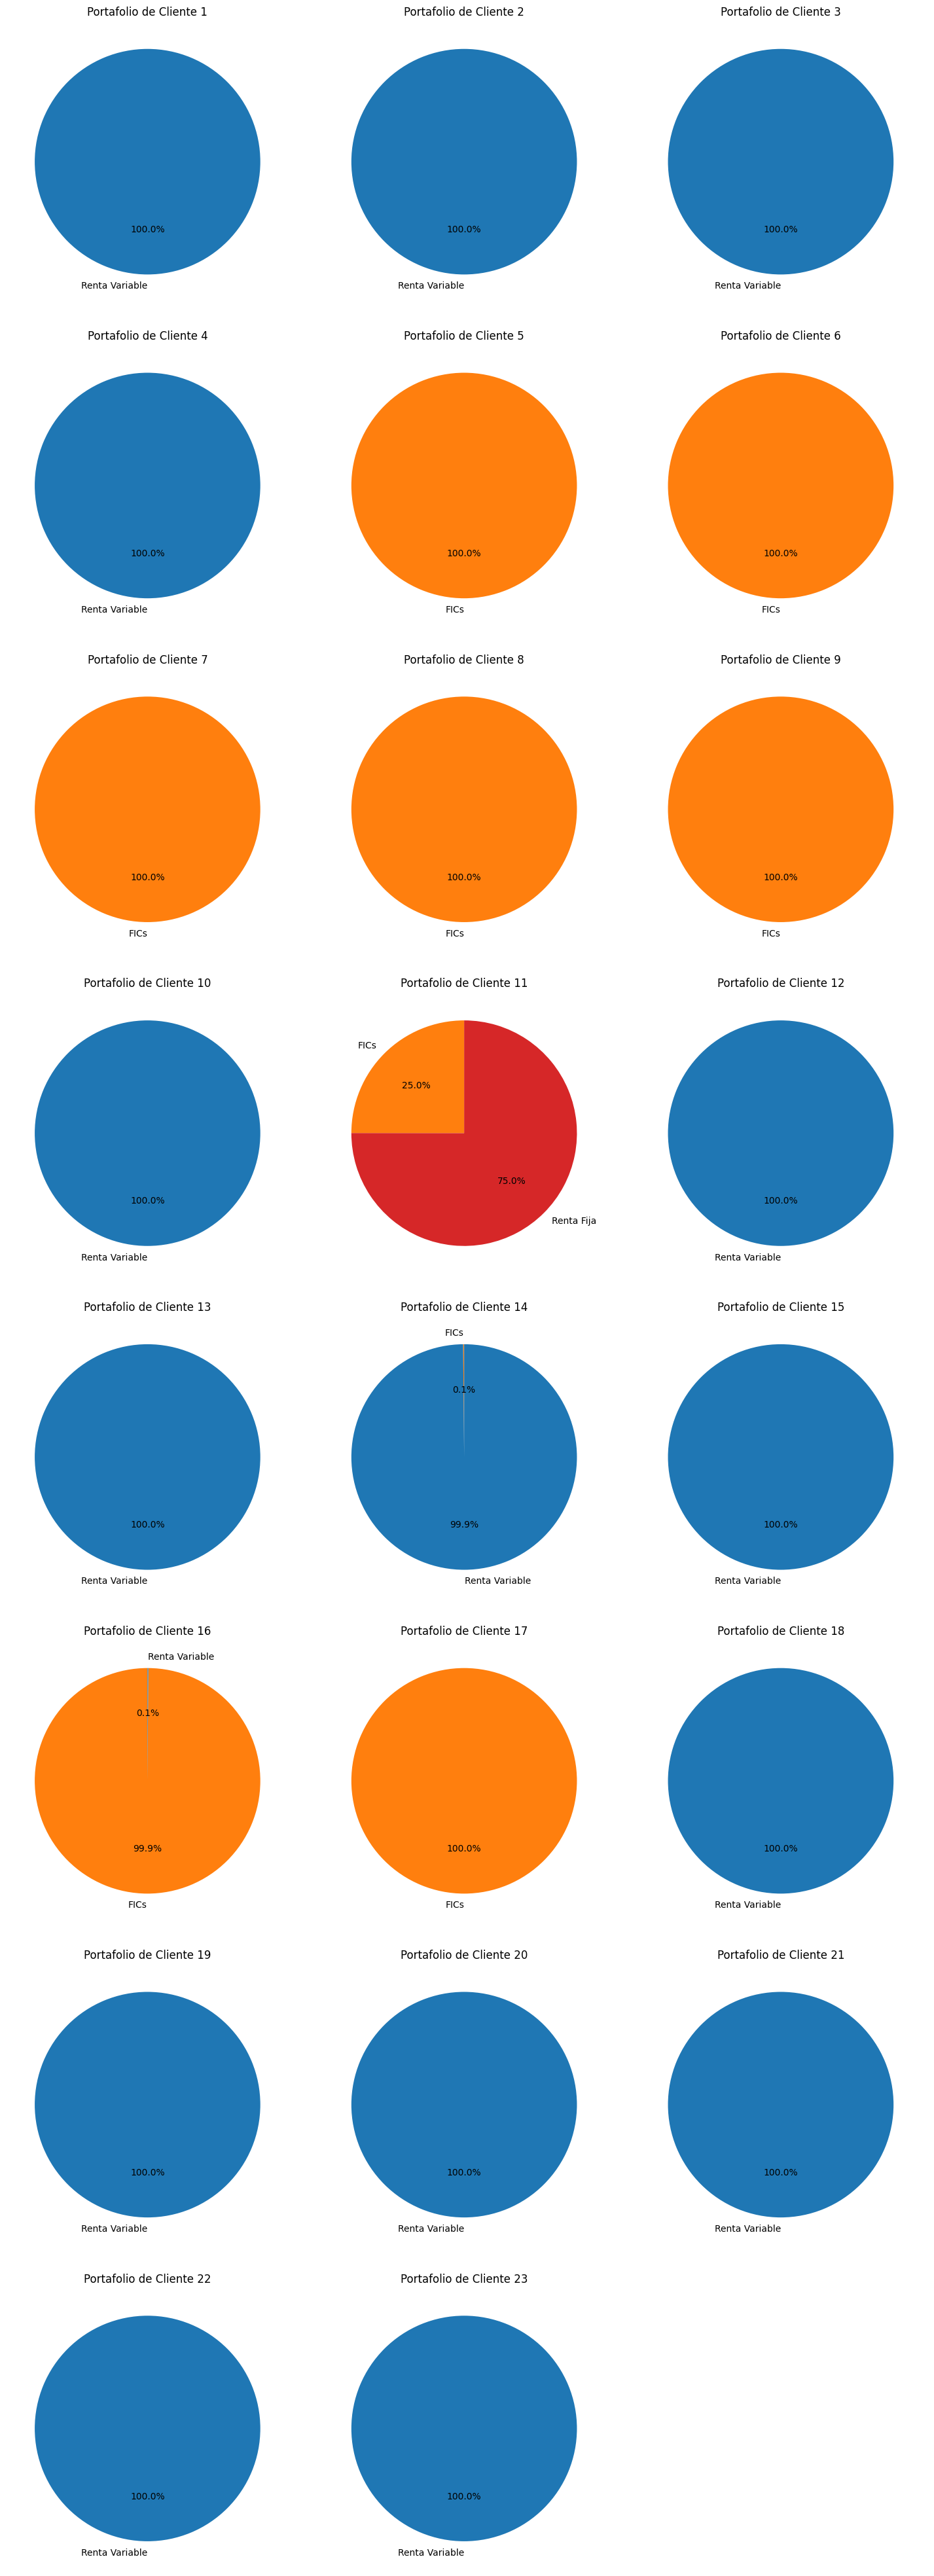

In [13]:
macroactivos_unicos = df['macroactivo'].unique()
colores_macroactivo = sns.color_palette("tab10", len(macroactivos_unicos))
color_mapping = {macroactivo: color for macroactivo, color in zip(macroactivos_unicos, colores_macroactivo)}

ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

portfolio_summary = df_ultima_fecha.groupby(['id_sistema_cliente', 'macroactivo'])['aba'].sum().reset_index()

portfolio_total = portfolio_summary.groupby('id_sistema_cliente')['aba'].sum().reset_index()
portfolio_total.rename(columns={'aba': 'total_portafolio'}, inplace=True)

portfolio_summary = pd.merge(portfolio_summary, portfolio_total, on='id_sistema_cliente')

portfolio_summary['porcentaje'] = (portfolio_summary['aba'] / portfolio_summary['total_portafolio']) * 100

clientes_unicos = portfolio_summary['id_sistema_cliente'].unique()
cliente_mapping = {cliente: f'Cliente {i+1}' for i, cliente in enumerate(clientes_unicos)}
portfolio_summary['cliente'] = portfolio_summary['id_sistema_cliente'].map(cliente_mapping)

num_clientes = len(clientes_unicos)
num_columns = 3
num_rows = (num_clientes + num_columns - 1) // num_columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(15, 5 * num_rows), squeeze=False)

for i, cliente in enumerate(clientes_unicos):
    data_cliente = portfolio_summary[portfolio_summary['id_sistema_cliente'] == cliente]
    etiquetas = data_cliente['macroactivo']
    valores = data_cliente['porcentaje']


    colores = [color_mapping[macroactivo] for macroactivo in etiquetas]

    axs[i // num_columns, i % num_columns].pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=90, colors=colores)
    axs[i // num_columns, i % num_columns].set_title(f'Portafolio de {cliente_mapping[cliente]}')

for j in range(i + 1, num_rows * num_columns):
    axs[j // num_columns, j % num_columns].axis('off')

plt.tight_layout(pad=3.0)
plt.show()



Como primer caso de análisis, tenemos este gráfico de torta donde se presenta el portafolio de cada cliente para 2024 y que porcentaje del mismo abarca cada macroactivo, se concluye entonces que los clientes tienen una inminente tendencia a solo formar parte de un solo macroactivo a la hora de invertir su dinero, no diversificando así su capital en distintos macroactivos y la gran mayoría de los mismos lo hacen en el mercado de renta variable

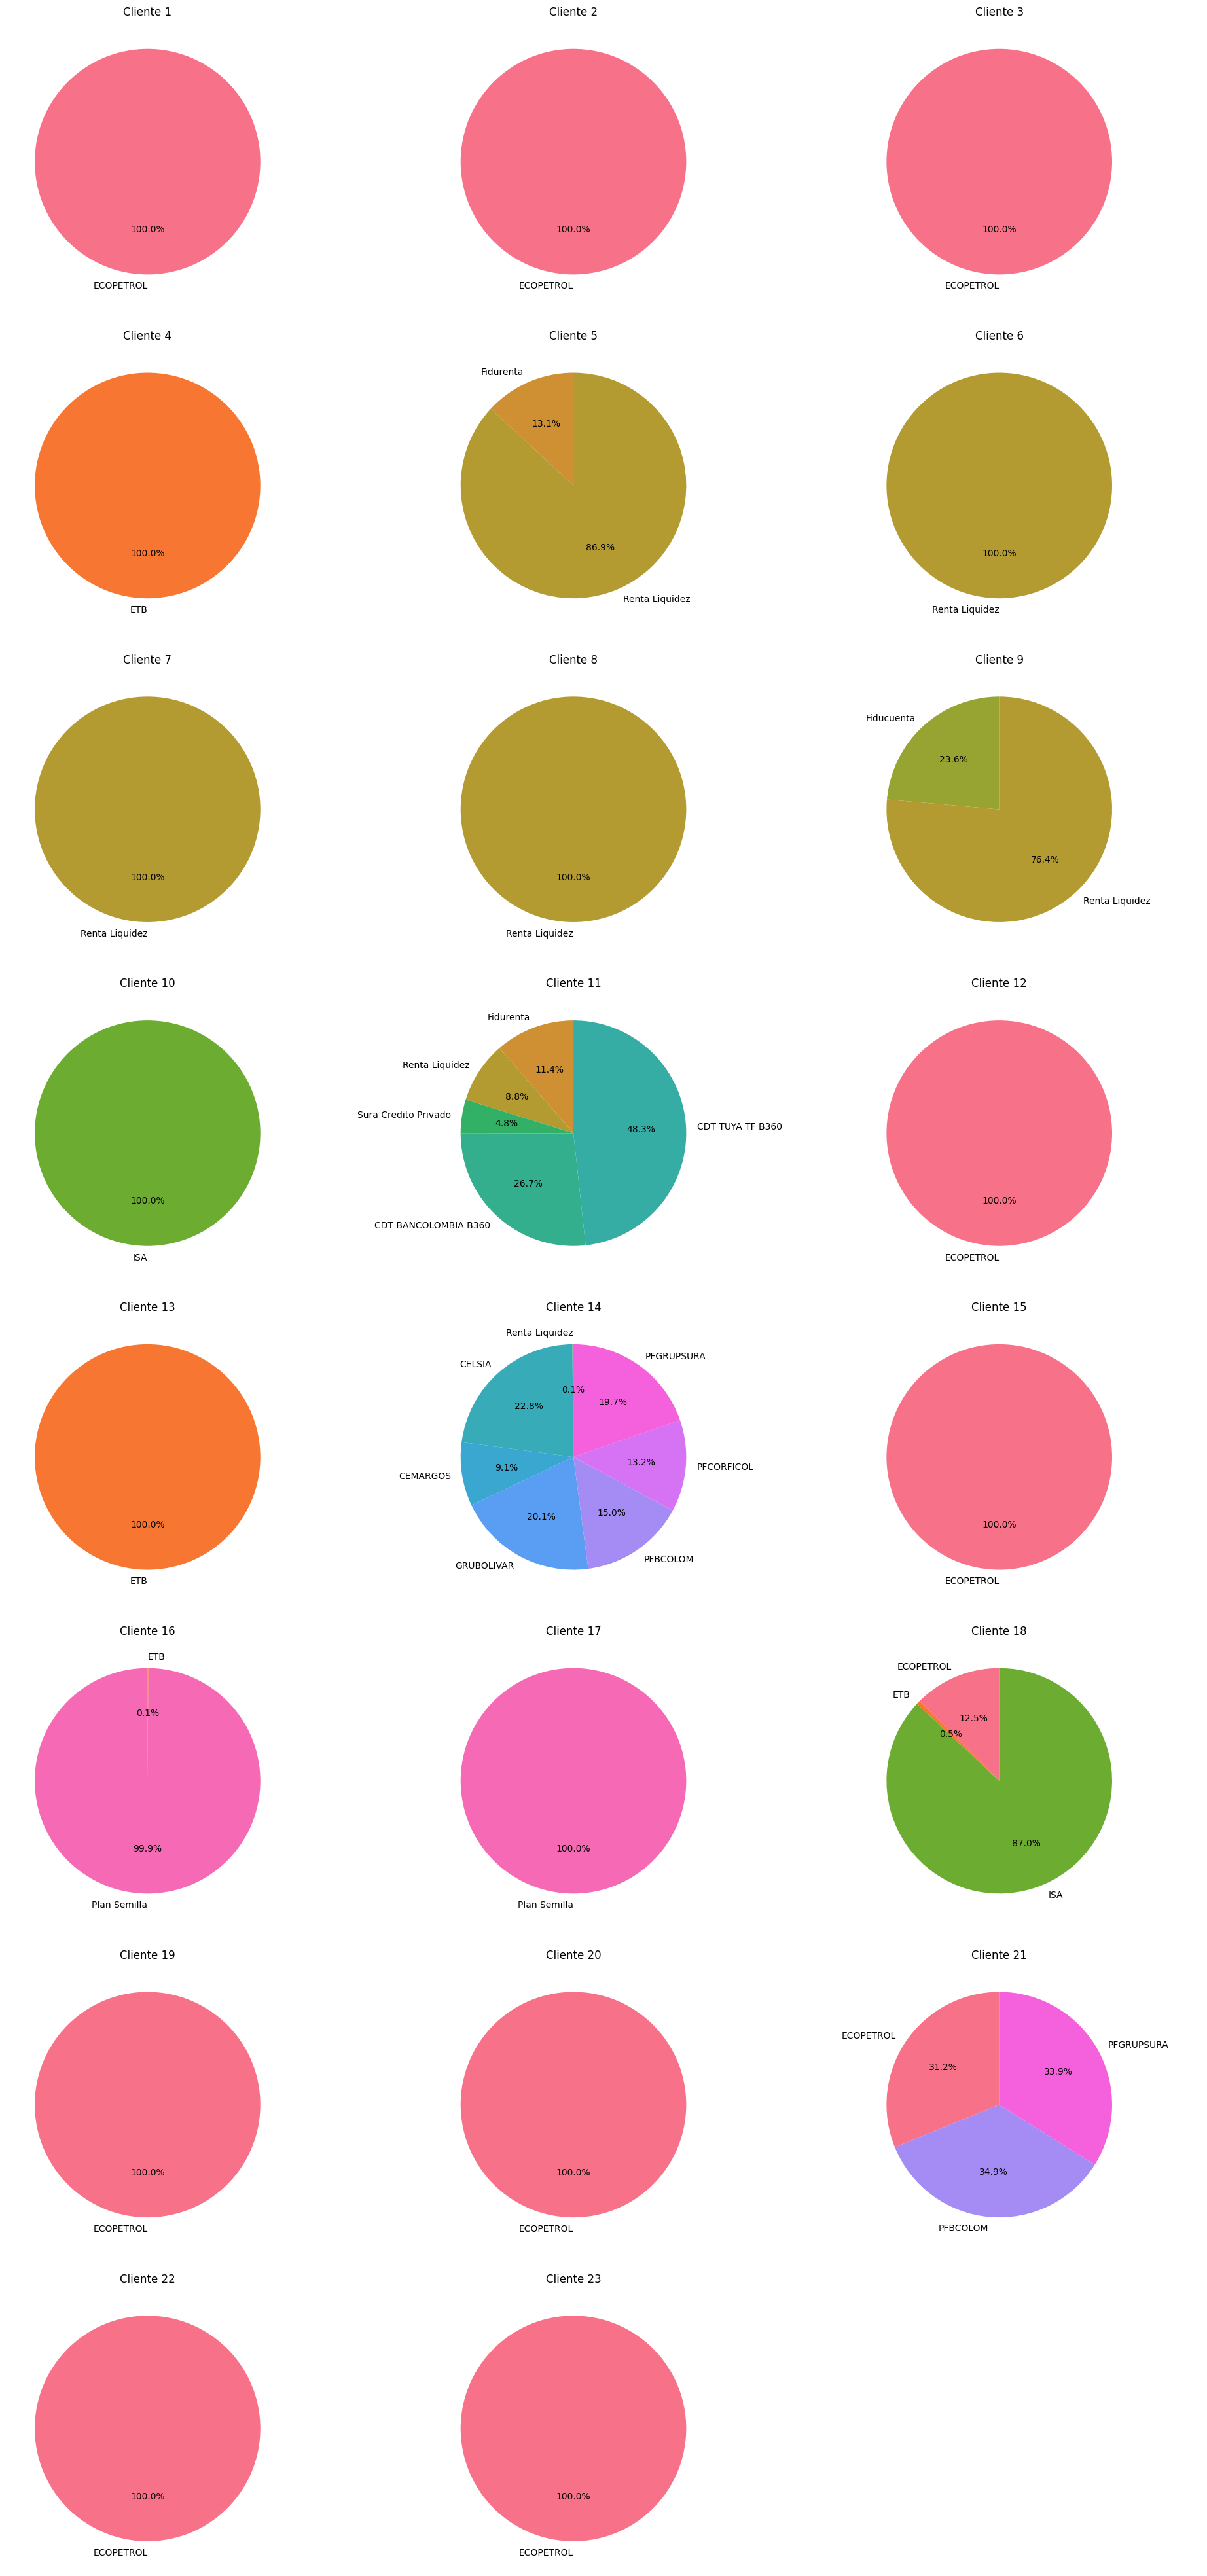

In [14]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

portfolio_summary = df_ultima_fecha.groupby(['id_sistema_cliente', 'macroactivo', 'activo'])['aba'].sum().reset_index()

portfolio_total = portfolio_summary.groupby('id_sistema_cliente')['aba'].sum().reset_index()
portfolio_total.rename(columns={'aba': 'total_portafolio'}, inplace=True)

portfolio_summary = pd.merge(portfolio_summary, portfolio_total, on='id_sistema_cliente')
portfolio_summary['porcentaje'] = (portfolio_summary['aba'] / portfolio_summary['total_portafolio']) * 100

clientes_unicos = portfolio_summary['id_sistema_cliente'].unique()
cliente_mapping = {cliente: f'Cliente {i+1}' for i, cliente in enumerate(clientes_unicos)}
portfolio_summary['cliente'] = portfolio_summary['id_sistema_cliente'].map(cliente_mapping)

activos_unicos = portfolio_summary['activo'].unique()
colores_activo = sns.color_palette("husl", len(activos_unicos))
color_mapping = {activo: color for activo, color in zip(activos_unicos, colores_activo)}

clientes = portfolio_summary['cliente'].unique()
num_clientes = len(clientes)
num_columns = 3
num_rows = (num_clientes + num_columns - 1) // num_columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 5 * num_rows), squeeze=False)

for i, cliente in enumerate(clientes):
    data_cliente = portfolio_summary[portfolio_summary['cliente'] == cliente]


    colores = [color_mapping[activo] for activo in data_cliente['activo']]


    axs[i // num_columns, i % num_columns].pie(data_cliente['porcentaje'], labels=data_cliente['activo'], autopct='%1.1f%%', startangle=90, colors=colores)
    axs[i // num_columns, i % num_columns].set_title(cliente)

for j in range(i + 1, num_rows * num_columns):
    axs[j // num_columns, j % num_columns].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


Inspeccionando más el comportamiento de las variables que hacen parte del macroactivo, podemos notar una congruencia con el gráfico anterior donde el factor común dominante son los activos de renta variable como lo son las acciones, siendo en este caso la más frecuente ecopetrol, además, podría uno como ingeniero financiero esperarse que los clientes con uso del 100% de su capital en algún macroactivo tuvieran al menos un poco diversificada su inversión en activos de esta misma índole, sin embargo, no ocurre así.

#Pregunta 2

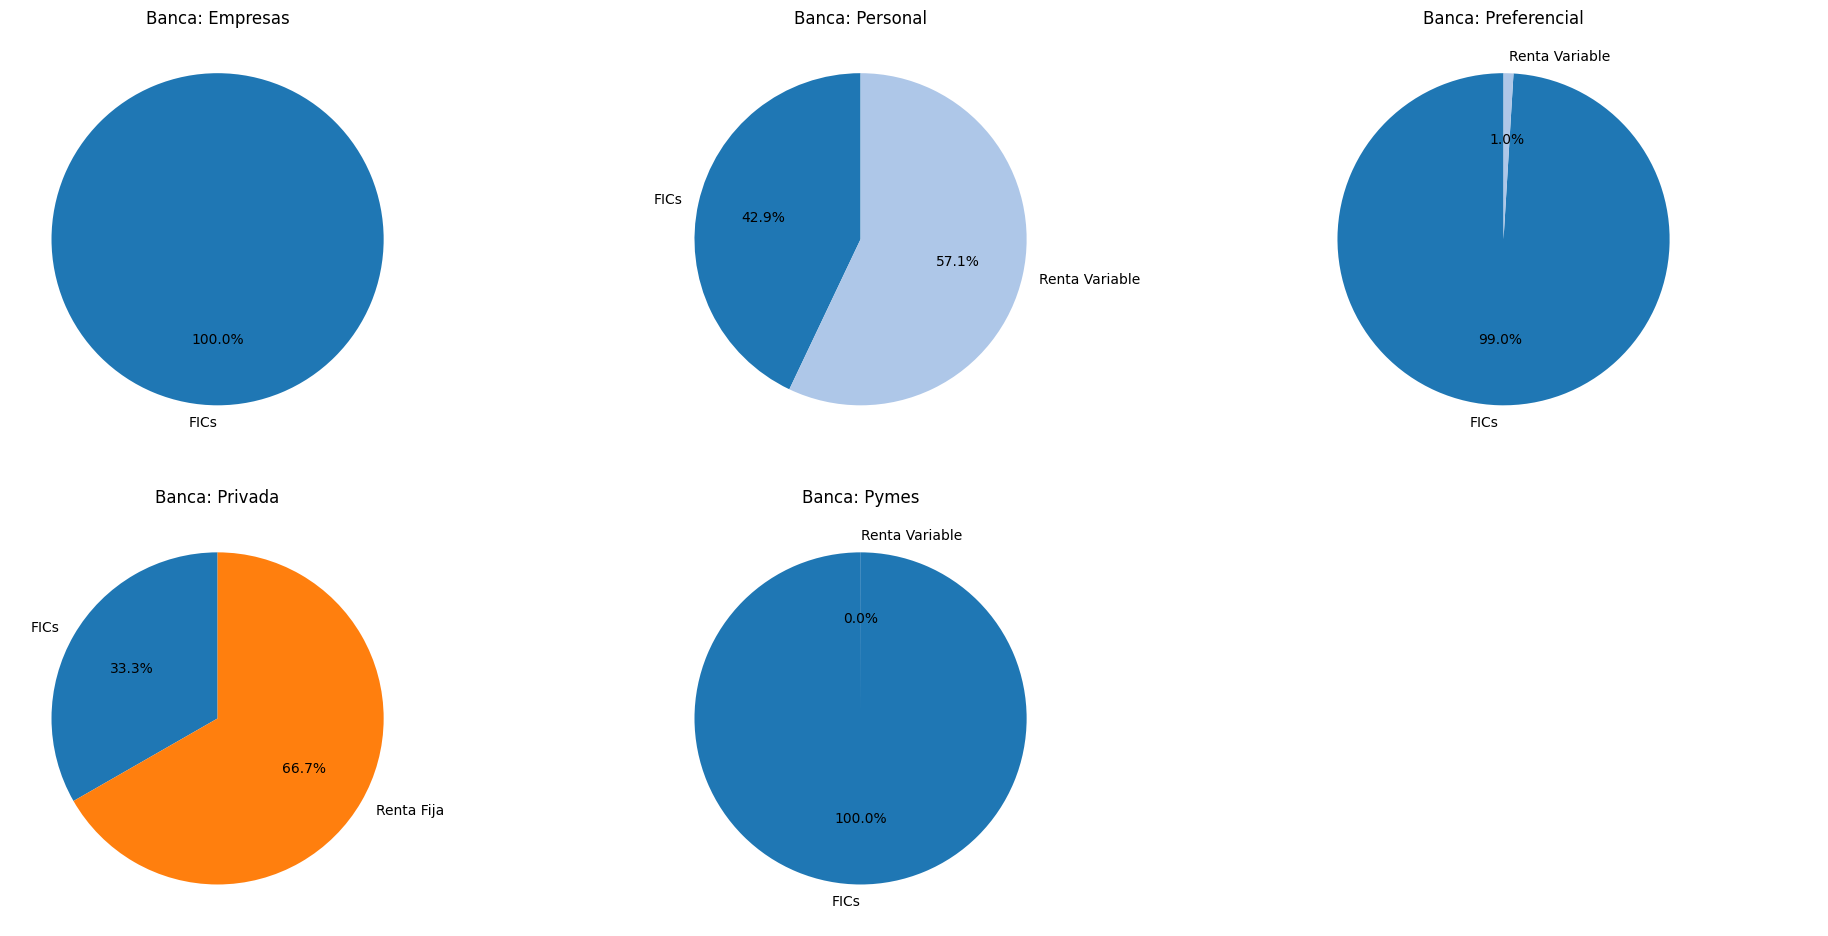

In [15]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

portfolio_summary = df_ultima_fecha.groupby(['banca', 'macroactivo'])['aba'].sum().reset_index()

portfolio_total = portfolio_summary.groupby('banca')['aba'].sum().reset_index()
portfolio_total.rename(columns={'aba': 'total_portafolio'}, inplace=True)

portfolio_summary = pd.merge(portfolio_summary, portfolio_total, on='banca')
portfolio_summary['porcentaje'] = (portfolio_summary['aba'] / portfolio_summary['total_portafolio']) * 100

macroactivos_unicos = portfolio_summary['macroactivo'].unique()
colores_macroactivo = sns.color_palette("tab20", len(macroactivos_unicos))
color_mapping = {macroactivo: color for macroactivo, color in zip(macroactivos_unicos, colores_macroactivo)}

bancas = portfolio_summary['banca'].unique()
num_bancas = len(bancas)
num_columns = 3
num_rows = (num_bancas + num_columns - 1) // num_columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 5 * num_rows), squeeze=False)

for i, banca in enumerate(bancas):
    data_banca = portfolio_summary[portfolio_summary['banca'] == banca]


    colores = [color_mapping[macroactivo] for macroactivo in data_banca['macroactivo']]


    axs[i // num_columns, i % num_columns].pie(data_banca['porcentaje'], labels=data_banca['macroactivo'], autopct='%1.1f%%', startangle=90, colors=colores)
    axs[i // num_columns, i % num_columns].set_title(f'Banca: {banca}')

for j in range(i + 1, num_rows * num_columns):
    axs[j // num_columns, j % num_columns].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


De lado de las bancas, se observa un comportamiento no acorde al análisis previsto anteriormente, donde la renta variable no destaca en este Item


#Pregunta 3

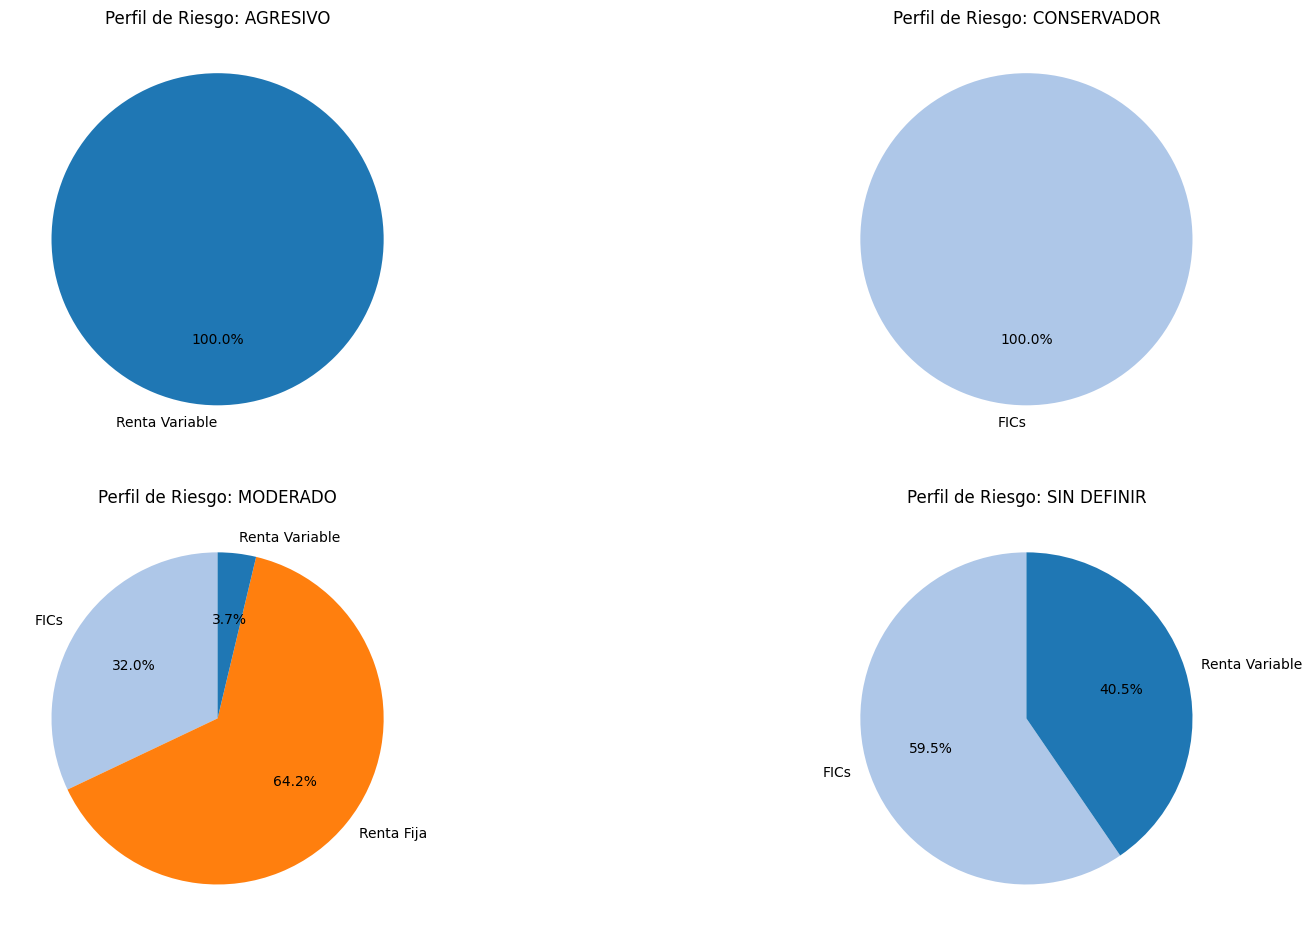

In [16]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

portfolio_summary = df_ultima_fecha.groupby(['perfil_riesgo', 'macroactivo'])['aba'].sum().reset_index()

portfolio_total = portfolio_summary.groupby('perfil_riesgo')['aba'].sum().reset_index()
portfolio_total.rename(columns={'aba': 'total_portafolio'}, inplace=True)

portfolio_summary = pd.merge(portfolio_summary, portfolio_total, on='perfil_riesgo')
portfolio_summary['porcentaje'] = (portfolio_summary['aba'] / portfolio_summary['total_portafolio']) * 100

macroactivos_unicos = portfolio_summary['macroactivo'].unique()
colores_macroactivo = sns.color_palette("tab20", len(macroactivos_unicos))
color_mapping = {macroactivo: color for macroactivo, color in zip(macroactivos_unicos, colores_macroactivo)}

perfiles_riesgo = portfolio_summary['perfil_riesgo'].unique()
num_perfiles = len(perfiles_riesgo)
num_columns = 2
num_rows = (num_perfiles + num_columns - 1) // num_columns

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(20, 5 * num_rows), squeeze=False)

for i, perfil in enumerate(perfiles_riesgo):
    data_perfil = portfolio_summary[portfolio_summary['perfil_riesgo'] == perfil]


    colores = [color_mapping[macroactivo] for macroactivo in data_perfil['macroactivo']]


    axs[i // num_columns, i % num_columns].pie(data_perfil['porcentaje'], labels=data_perfil['macroactivo'], autopct='%1.1f%%', startangle=90, colors=colores)
    axs[i // num_columns, i % num_columns].set_title(f'Perfil de Riesgo: {perfil}')

for j in range(i + 1, num_rows * num_columns):
    axs[j // num_columns, j % num_columns].axis('off')

plt.tight_layout(pad=3.0)
plt.show()


Ahora, contemplando estas 4 categorías de perfil de riesgo podemos observar como en cada una de ellas se distribuyen cada uno de los macroactivos, destacando aquí la no diversificación de los mismos por parte del perfil agresivo y conservador

#Pregunta 4

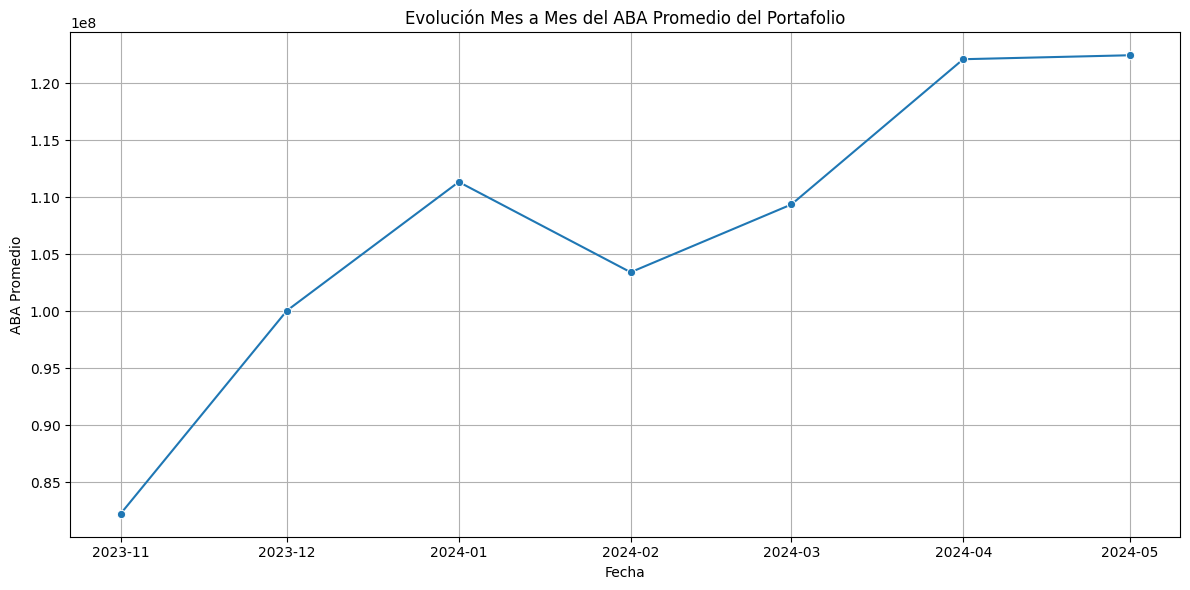

In [17]:
def plot_evolucion_aba_promedio(df, fecha_inicio, fecha_fin):

    df['fecha'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


    df_filtrado = df[(df['fecha'] >= fecha_inicio) & (df['fecha'] <= fecha_fin)]


    evolucion_aba = df_filtrado.groupby('fecha')['aba'].mean().reset_index()


    plt.figure(figsize=(12, 6))
    sns.lineplot(data=evolucion_aba, x='fecha', y='aba', marker='o')
    plt.title('Evolución Mes a Mes del ABA Promedio del Portafolio')
    plt.xlabel('Fecha')
    plt.ylabel('ABA Promedio')
    plt.grid()
    plt.tight_layout()
    plt.show()

fecha_inicio = '2023-01-01'
fecha_fin = '2024-05-31'

plot_evolucion_aba_promedio(df_final, fecha_inicio, fecha_fin)


Por este lado, entiéndase ABA como Activos bajo administración, donde desde noviembre de 2023 hasta mayo de 2024 ha existido un crecimiento, que pudo ocurrir por un aumento en la captación de estos activos o también por una valorización de los mismos.

#Información adicional

##Participación del portafolio discriminado en perfil de riesgo

<ipython-input-18-b6d03dba2265>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=participacion, x='perfil_riesgo', y='aba', palette='viridis', order=orden)


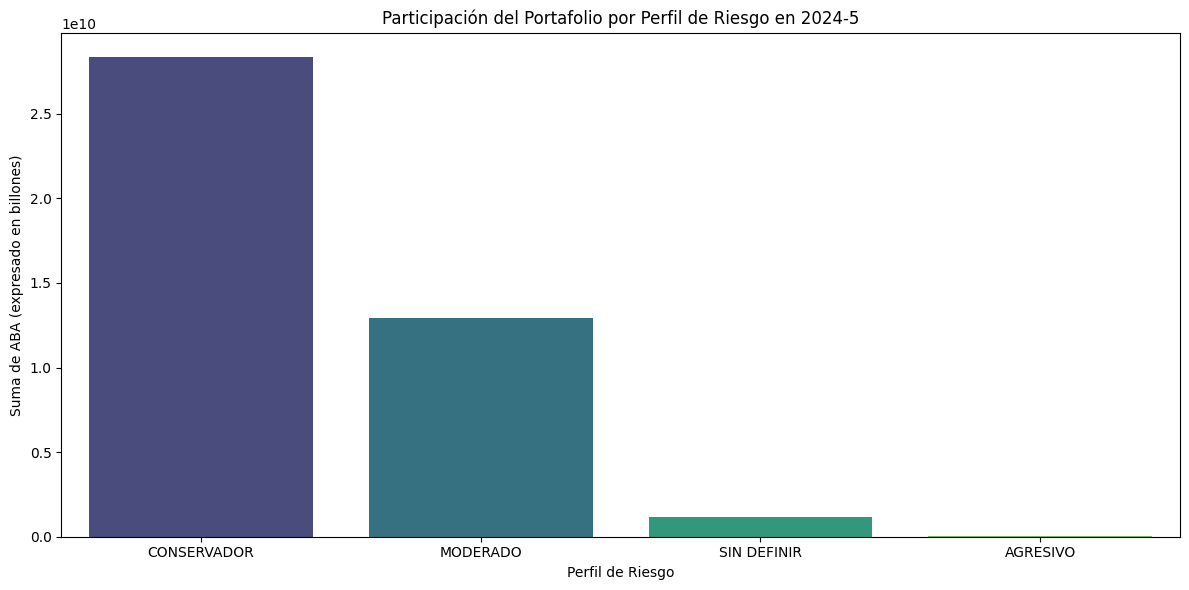

In [18]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

participacion = df_ultima_fecha.groupby(['perfil_riesgo'])['aba'].sum().reset_index()

participacion = participacion.sort_values(by='aba', ascending=False)
orden = participacion['perfil_riesgo']

plt.figure(figsize=(12, 6))
sns.barplot(data=participacion, x='perfil_riesgo', y='aba', palette='viridis', order=orden)
plt.title(f'Participación del Portafolio por Perfil de Riesgo en {ultima_fecha["year"]}-{ultima_fecha["month"]}')
plt.xlabel('Perfil de Riesgo')
plt.ylabel('Suma de ABA (expresado en billones)')
plt.tight_layout()
plt.show()


Sin embargo, es una deducción equivocada, si observamos el ABA en qué perfiles se encuentran distribuidos, observamos que para los dos años que tenemos información el principal perfil donde se encuentra el capital lo hacen personas con un carácter conservador. Contradictorio, verdad?

##Participación del portafolio discriminado en macroactivo

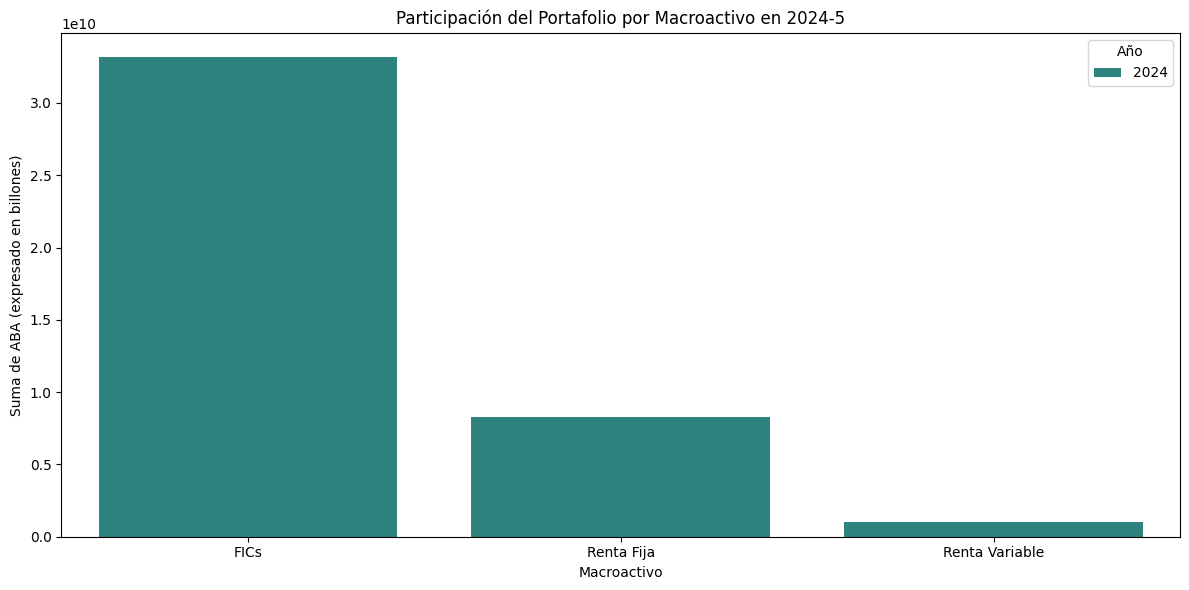

In [19]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

participacion = df_ultima_fecha.groupby(['macroactivo', 'year'])['aba'].sum().reset_index()

total_por_macroactivo = participacion.groupby('macroactivo')['aba'].sum().reset_index()
total_por_macroactivo = total_por_macroactivo.sort_values(by='aba', ascending=False)
orden = total_por_macroactivo['macroactivo']

plt.figure(figsize=(12, 6))
sns.barplot(data=participacion, x='macroactivo', y='aba', hue='year', palette='viridis', order=orden)
plt.title(f'Participación del Portafolio por Macroactivo en {ultima_fecha["year"]}-{ultima_fecha["month"]}')
plt.xlabel('Macroactivo')
plt.ylabel('Suma de ABA (expresado en billones)')
plt.legend(title='Año')
plt.tight_layout()
plt.show()

Profundizando aún más nos percatamos que inclusive, el macroactivo con menor participación es el de renta variable, y a partir de aquí es donde empieza a tener coherencia que el perfil conservador es el de mayor participación en el valor del portafolio, puesto que el macroactivo con mayor intervención son los Fondos de inversión colectivos.

##Participación del portafolio discriminado en participación del activo

<ipython-input-20-4e7f4bd4aaae>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=participacion, x='activo', y='aba', palette='viridis', order=orden)


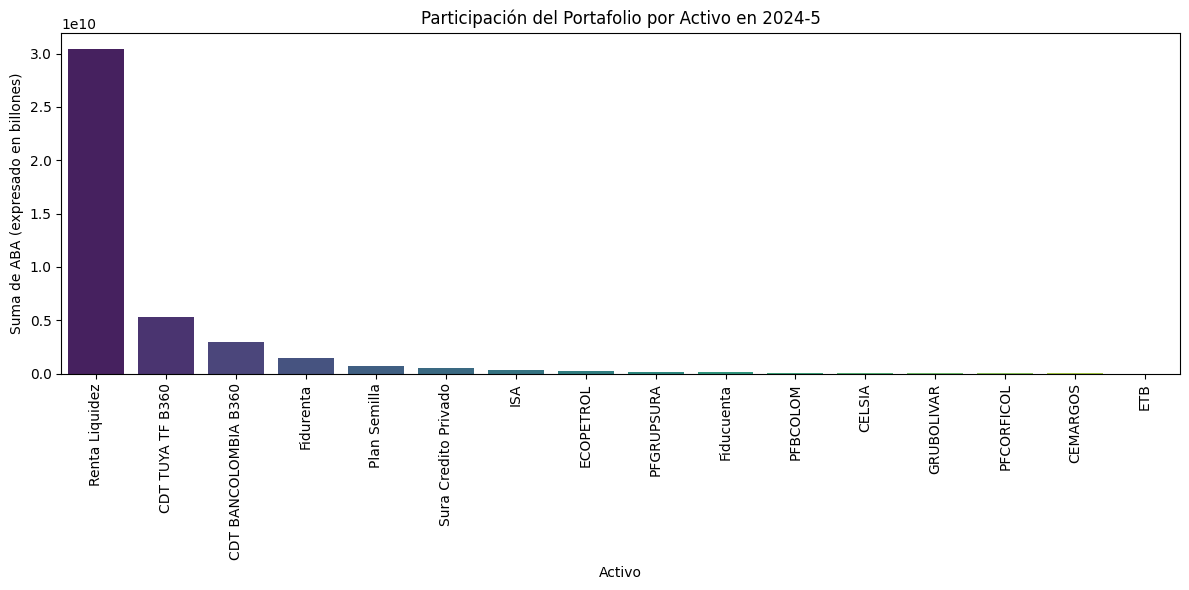

In [20]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultimo_mes = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

participacion = df_ultimo_mes.groupby(['activo'])['aba'].sum().reset_index()

participacion = participacion.sort_values(by='aba', ascending=False)
orden = participacion['activo']

plt.figure(figsize=(12, 6))
sns.barplot(data=participacion, x='activo', y='aba', palette='viridis', order=orden)
plt.title(f'Participación del Portafolio por Activo en {ultima_fecha["year"]}-{ultima_fecha["month"]}')
plt.xlabel('Activo')
plt.ylabel('Suma de ABA (expresado en billones)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Con este gráfico, donde se enseña el monto en billones que cada activo que compone el portafolio contribuye en el valor total del mismo, se aprecia que existe relación, y que haber terminado el análisis hasta conocer la evolución del ABA en el tiempo nos hubiera llevado a conclusiones equivocadas.

##Participación del portafolio discriminado por cliente

<ipython-input-21-557f00660220>:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=participacion_cliente, x='cliente', y='porcentaje', hue='year', ci=None)


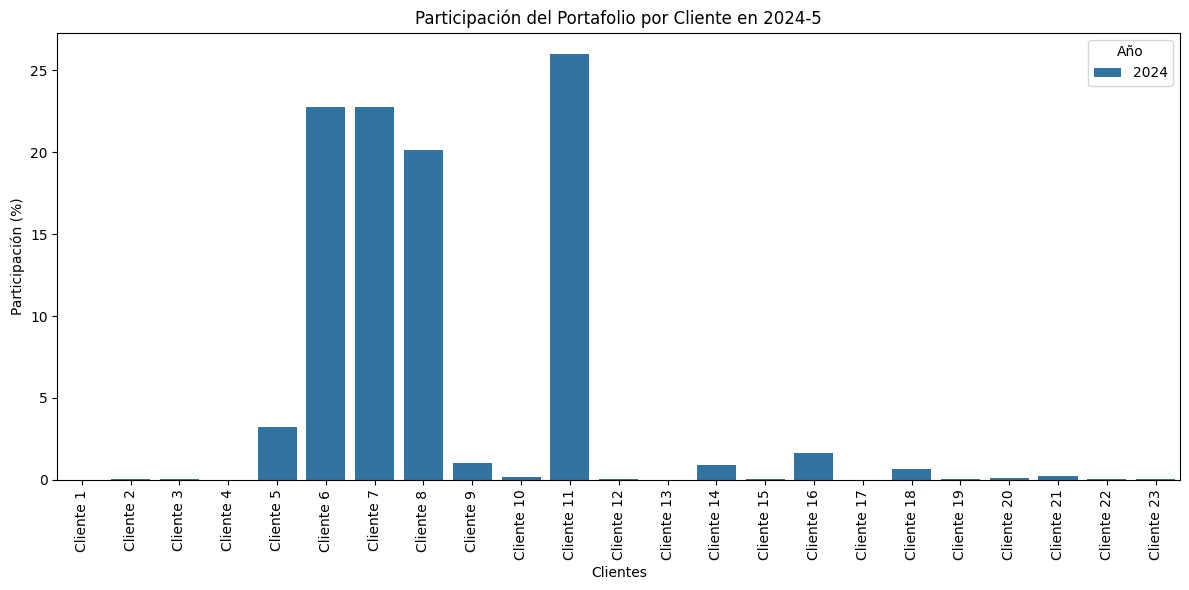

In [21]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

participacion_cliente = df_ultima_fecha.groupby(['id_sistema_cliente', 'year'])['aba'].sum().reset_index()

total_portafolio = participacion_cliente.groupby('year')['aba'].sum().reset_index()
total_portafolio.rename(columns={'aba': 'total_portafolio'}, inplace=True)

participacion_cliente = pd.merge(participacion_cliente, total_portafolio, on='year')
participacion_cliente['porcentaje'] = (participacion_cliente['aba'] / participacion_cliente['total_portafolio']) * 100

clientes_unicos = participacion_cliente['id_sistema_cliente'].unique()
cliente_mapping = {cliente: f'Cliente {i + 1}' for i, cliente in enumerate(clientes_unicos)}
participacion_cliente['cliente'] = participacion_cliente['id_sistema_cliente'].map(cliente_mapping)

plt.figure(figsize=(12, 6))
sns.barplot(data=participacion_cliente, x='cliente', y='porcentaje', hue='year', ci=None)
plt.title(f'Participación del Portafolio por Cliente en {ultima_fecha["year"]}-{ultima_fecha["month"]}')
plt.xlabel('Clientes')
plt.ylabel('Participación (%)')
plt.xticks(rotation=90)
plt.legend(title='Año')
plt.tight_layout()
plt.show()


Hay que entrar a analizar las concentraciones de los clientes sobre el valor del portafolio, y nos percatamos que existen 4 clientes que suman más del 60% de la participación total, teniendo inclusive un caso en el que 1 de ellos posee el 25% de todas las captaciones de la entidad financiera.

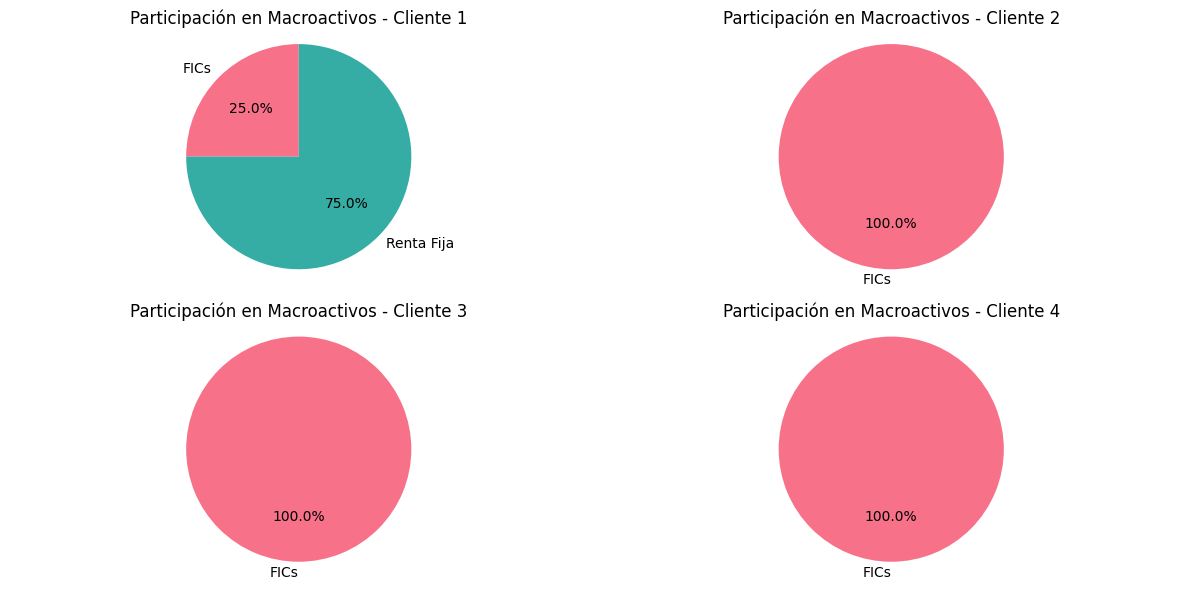

In [22]:
ultima_fecha = df_final[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_final[(df_final['year'] == ultima_fecha['year']) & (df_final['month'] == ultima_fecha['month'])]

participacion_cliente = df_ultima_fecha.groupby(['id_sistema_cliente'])['aba'].sum().reset_index()

total_portafolio = participacion_cliente['aba'].sum()
participacion_cliente['porcentaje'] = (participacion_cliente['aba'] / total_portafolio) * 100

top_clientes = participacion_cliente.nlargest(4, 'porcentaje')['id_sistema_cliente']

df_top_clientes = df_ultima_fecha[df_ultima_fecha['id_sistema_cliente'].isin(top_clientes)]

macroactivo_cliente = df_top_clientes.groupby(['id_sistema_cliente', 'macroactivo'])['aba'].sum().reset_index()

unique_macroactivos = macroactivo_cliente['macroactivo'].unique()
colors = sns.color_palette("husl", len(unique_macroactivos))

plt.figure(figsize=(12, 6))
num_clientes = len(top_clientes)
num_columns = 2
num_rows = (num_clientes + num_columns - 1) // num_columns

for i, cliente in enumerate(top_clientes):
    data_cliente = macroactivo_cliente[macroactivo_cliente['id_sistema_cliente'] == cliente]

    cliente_nombre = f'Cliente {i + 1}'

    plt.subplot(num_rows, num_columns, i + 1)
    plt.pie(data_cliente['aba'], labels=data_cliente['macroactivo'], autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Participación en Macroactivos - {cliente_nombre}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

Vemos entonces una vez más, una aglomeración de esos clientes sobre los macroactivos que más tienen peso en la cartera, explicando así cómo la renta variable no tiene peso sobre el portafolio

##Participación del portafolio por banca

In [23]:
df_filtrado = df_final[df_final['year'].isin([2023, 2024])]

ultima_fecha = df_filtrado[['year', 'month']].drop_duplicates().sort_values(by=['year', 'month']).iloc[-1]
df_ultima_fecha = df_filtrado[(df_filtrado['year'] == ultima_fecha['year']) & (df_filtrado['month'] == ultima_fecha['month'])]

participacion_banca = df_ultima_fecha.groupby('banca')['aba'].sum().reset_index()

total_portafolio = participacion_banca['aba'].sum()
participacion_banca['porcentaje'] = (participacion_banca['aba'] / total_portafolio) * 100

plt.figure(figsize=(12, 6))
sns.barplot(data=participacion_banca, x='banca', y='porcentaje', palette='viridis', ci=None)

plt.xticks(rotation=45)
plt.title('Participación del Portafolio por Tipo de Banca en la Última Fecha Disponible')
plt.xlabel('Tipo de Banca')
plt.ylabel('Porcentaje de Participación')
plt.tight_layout()
plt.show()

IndexError: single positional indexer is out-of-bounds

Por último, contemplamos como la banca que mayor tiene peso sobre el ABA es la banca privada para el último periodo de análisis, y la persona natural la menor ponderación en este.

#Conclusiones generales

1.Existe una falta de diversificación en las inversiones, ya que la mayoría de los clientes opta por un solo macroactivo, e inclusive un solo activo dentro de este, y principalmente ocurre en renta variable​

2.A pesar de la alta participación de clientes en renta variable, los perfiles conservadores dominan en valor total, con una preferencia por fondos de inversión colectivos

3.Una concentración de capital se da en pocos clientes, con 4 de ellos acumulando más del 60% del portafolio total, lo que impacta significativamente en la estructura de la cartera
